In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Cleaning

In [18]:
# Load the dataset
file_path = 'EV dataset.csv'
df = pd.read_csv(file_path)

In [19]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                      State/UT  Electric  Non-electric
0  Andaman and Nicobar Islands       190        161258
1               Andhra Pradesh     67905      16553509
2            Arunachal Pradesh        28        303673
3                        Assam    120423       5312457
4                        Bihar    161060      11631081


In [20]:
# Display the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())



Summary statistics of the dataset:
            Electric  Non-electric
count      34.000000  3.400000e+01
mean    83251.911765  1.016285e+07
std    119600.375679  1.161133e+07
min        20.000000  4.443000e+04
25%      1504.750000  5.931312e+05
50%     43125.000000  6.184873e+06
75%    114900.250000  1.622194e+07
max    574967.000000  4.385255e+07


In [21]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
State/UT        0
Electric        0
Non-electric    0
dtype: int64


# Exploratory Data Analysis (EDA)

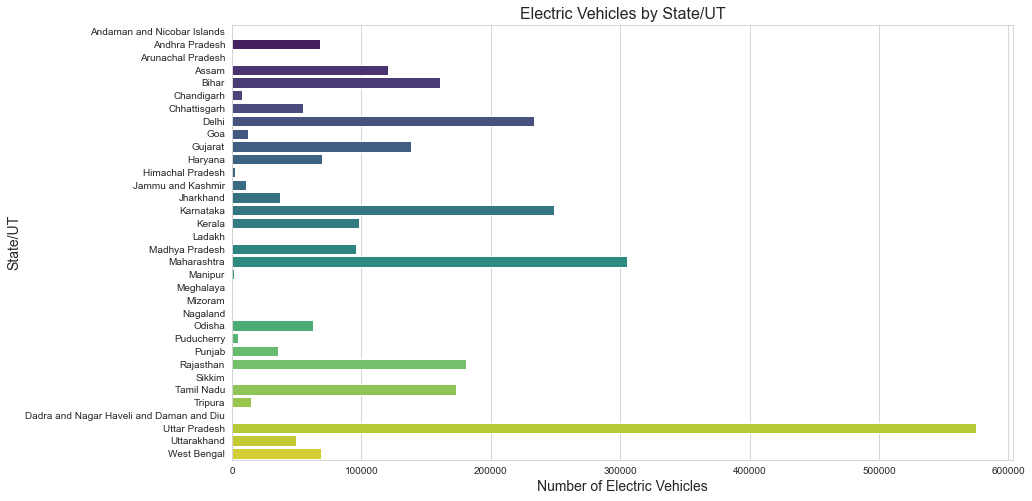

In [22]:
# Set the plot size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
# Create a bar plot
sns.barplot(x='Electric', y='State/UT', data=df, palette='viridis')
# Add titles and labels
plt.title('Electric Vehicles by State/UT', fontsize=16)
plt.xlabel('Number of Electric Vehicles', fontsize=14)
plt.ylabel('State/UT', fontsize=14)

# Show the plot
plt.show()


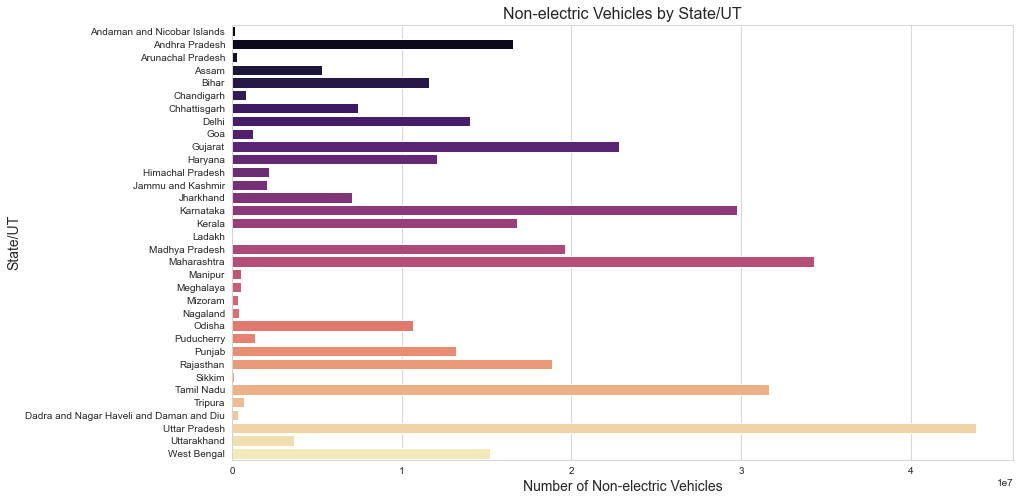

In [23]:
# Set the plot size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a bar plot for Non-electric vehicles
sns.barplot(x='Non-electric', y='State/UT', data=df, palette='magma')

# Add titles and labels
plt.title('Non-electric Vehicles by State/UT', fontsize=16)
plt.xlabel('Number of Non-electric Vehicles', fontsize=14)
plt.ylabel('State/UT', fontsize=14)

# Show the plot
plt.show()

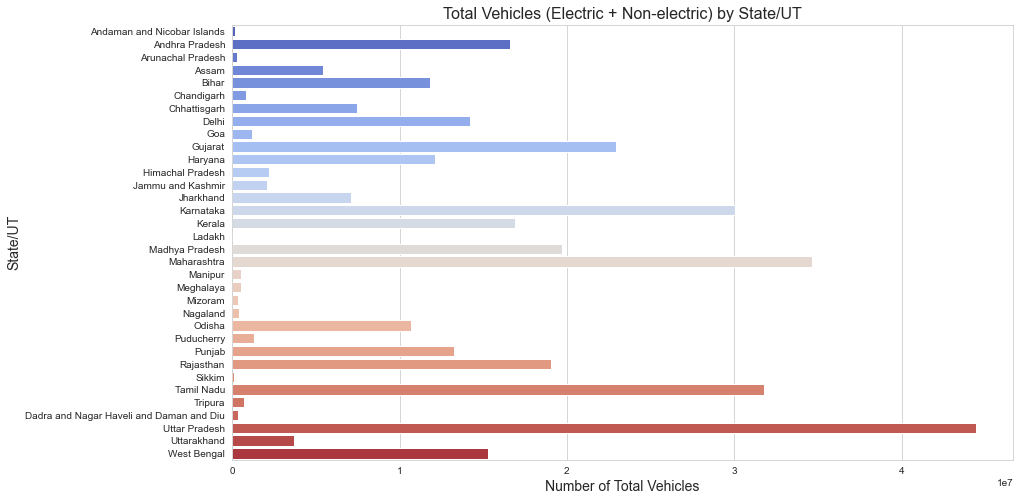

In [24]:
# Create a new column for Total Vehicles
df['Total Vehicles'] = df['Electric'] + df['Non-electric']

# Set the plot size and style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create a bar plot for Total Vehicles
sns.barplot(x='Total Vehicles', y='State/UT', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Total Vehicles (Electric + Non-electric) by State/UT', fontsize=16)
plt.xlabel('Number of Total Vehicles', fontsize=14)
plt.ylabel('State/UT', fontsize=14)

# Show the plot
plt.show()

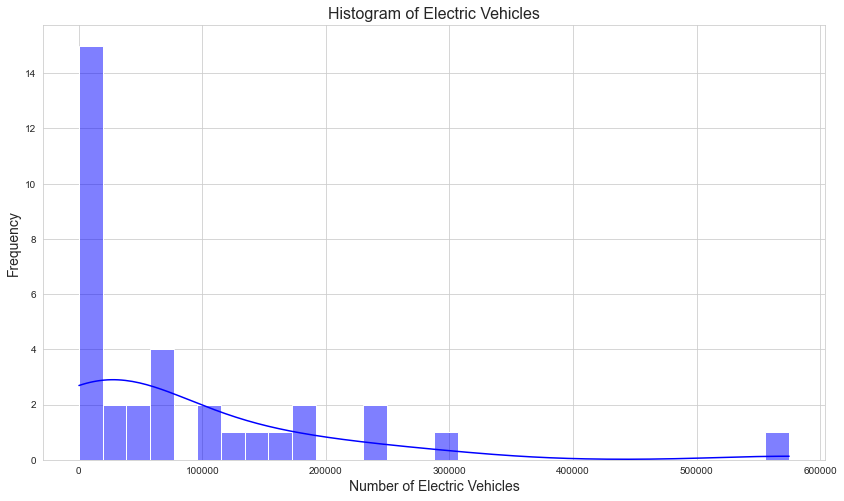

In [46]:
# Histogram for Electric vehicles
plt.figure(figsize=(14, 8))
sns.histplot(df['Electric'], bins=30, kde=True, color='blue')
plt.title('Histogram of Electric Vehicles', fontsize=16)
plt.xlabel('Number of Electric Vehicles', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

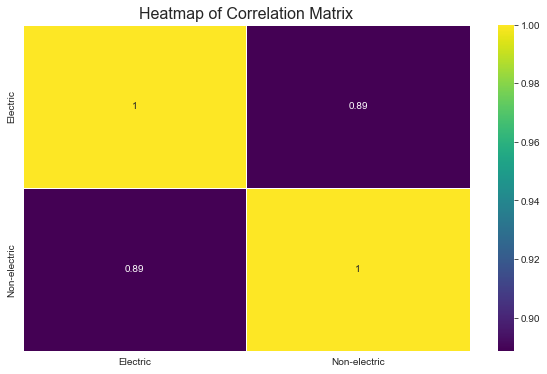

In [47]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df[['Electric', 'Non-electric']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

# Market Segmentation

In [26]:
from sklearn.cluster import KMeans
import numpy as np


In [27]:
# Prepare the data for clustering
X = df[['Electric', 'Non-electric']]


In [31]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [32]:
# Add the cluster results to the dataframe
print(df.head())

                      State/UT  Electric  Non-electric  Total Vehicles  \
0  Andaman and Nicobar Islands       190        161258          161448   
1               Andhra Pradesh     67905      16553509        16621414   
2            Arunachal Pradesh        28        303673          303701   
3                        Assam    120423       5312457         5432880   
4                        Bihar    161060      11631081        11792141   

   Electric Ratio  Cluster  
0        0.001177        0  
1        0.004085        1  
2        0.000092        0  
3        0.022166        0  
4        0.013658        0  


# PCA

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [35]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

In [37]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['State/UT'] = df['State/UT']
pca_df['Cluster'] = df['Cluster']

In [38]:
# Display the explained variance ratio
print(pca.explained_variance_ratio_)

[0.94435873 0.05564127]


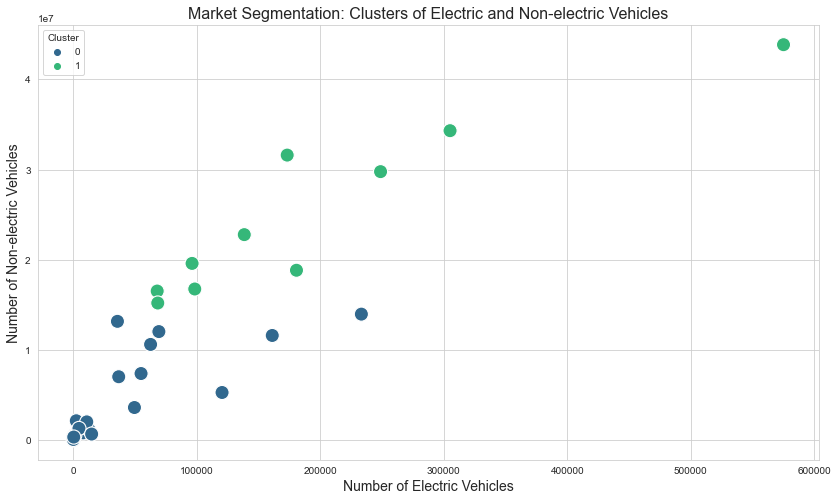

In [44]:
# Plot the clusters with larger points
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Electric', y='Non-electric', hue='Cluster', data=df, palette='viridis', s=200)
plt.title('Market Segmentation: Clusters of Electric and Non-electric Vehicles', fontsize=16)
plt.xlabel('Number of Electric Vehicles', fontsize=14)
plt.ylabel('Number of Non-electric Vehicles', fontsize=14)
plt.show()